ar# DeepBLU-Z model testing

Here we will import some fish images and use them to test our trained DeepBLU-Z models.

The hdf5 dataset images_ds.h5 contains 59,835 labeled
images and 2388 unlabeled images for verifying models after training for a total of 62223 images. The
2388 unlabeled images are not used during training and are intended for post-hoc validation like this.

First, let's read in some images and look at the data:

In [16]:
# Import database of images
import h5py
hdf_path = '../data/training_data/images_ds.h5'
# hdf_path = '../data/danionella_test_data/images_ds.h5'
hdf_file = h5py.File(hdf_path, 'r')
for gname, group in hdf_file.items():
    for dname, ds in group.items():
        images = ds

# Pull out nine random images from set held out during training and display
import numpy as np
# unlabeled_indices = np.linspace(59836, 62223, 62223-59835, dtype=int)
# unlabeled_indices = np.linspace(0, 9, 10, dtype=int)
unlabeled_indices = np.linspace(0, 60000-1, 60000, dtype=int)

import random
image_indices = random.sample(list(unlabeled_indices), 9)
image_indices.sort()

import matplotlib.pyplot as plt
from skimage.util import montage

images = images[image_indices[:], :, :]
images = np.transpose(images, (0, 2, 1))

/home/userman/.virtualenvs/DeepBLU-Z/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  after removing the cwd from sys.path.


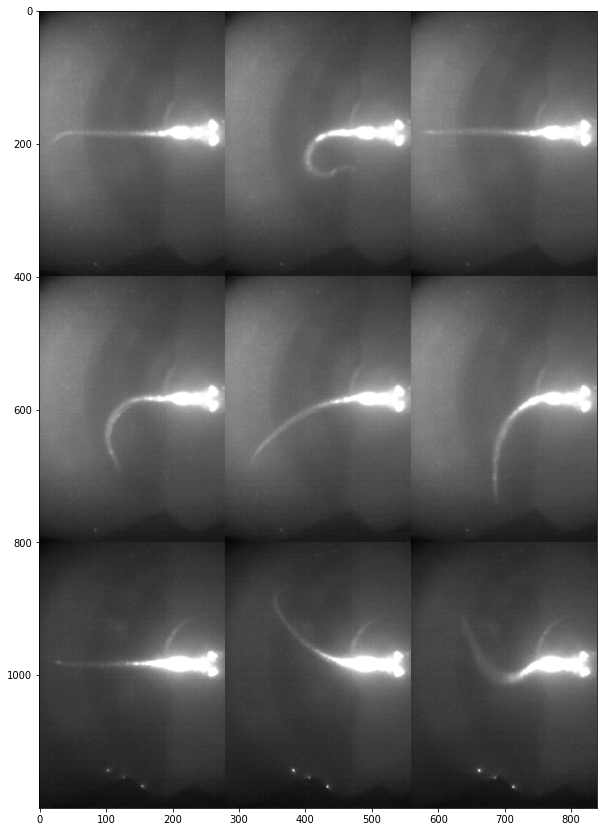

In [17]:
plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(images), cmap='gray')

plt.savefig('../data/test_data/danionella_unmarked.png', dpi=300, quality=100, format='png')

Now let's run these images through one of our models for pose estimation and display the results:

In [20]:
%%capture

from PIL import Image
import copy

tracked_images = copy.deepcopy(images)
for im_num in range(images.shape[0]):
    image = Image.fromarray(images[im_num, :, :])
    image.save('../data/test_data/temp.tif')
    ! python3 ../main.py -m predict --load ../models/091620/resnet18_50e/resnet18 -t ../data/test_data/temp.tif
    # ! python3 ../main.py -m predict --load ../models/091620/resnet18_50e/resnet18 -t ../data/test_data/temp.tif
    tracked_images[im_num, :, :] = Image.open('../data/test_data/temp_tracked.tif')

/home/userman/.virtualenvs/DeepBLU-Z/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  after removing the cwd from sys.path.


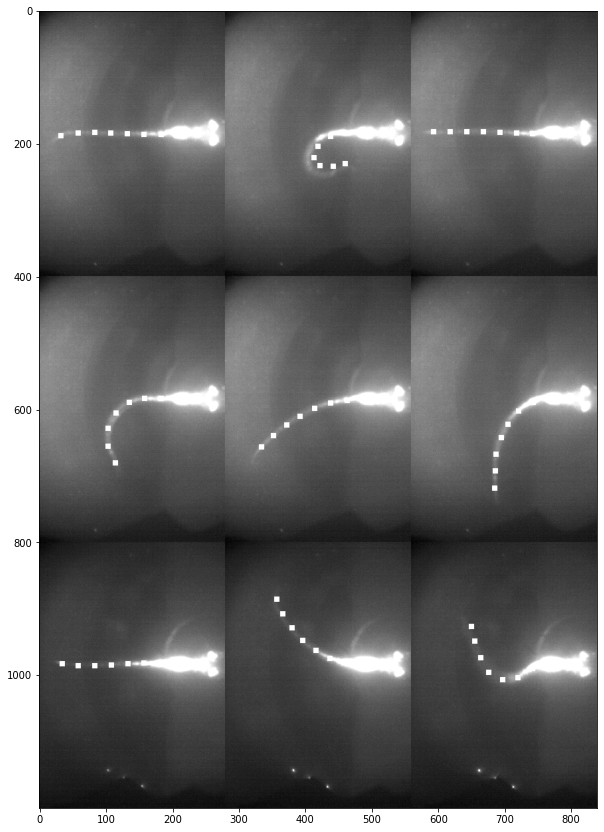

In [21]:
plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(tracked_images), cmap='gray')

plt.savefig('../data/test_data/danionella_marked.png', dpi=300, quality=100, format='png')

Test running on stacks

In [2]:
# %%capture

! python3 ../main.py -m predict --load ../models/101120/resnet18_retrain_trans/resnet18 -t ../data/test_data/test_stack1.tiff

GPU enabled
2020-10-11 22:04:28,304:INFO: Start with arguments Namespace(backbone='resnet18', batch_size=16, datapath=PosixPath('data/training_data'), epochs=50, load='../models/101120/resnet18_retrain_trans/resnet18', lr=0.05, lr_decay=0.75, lr_decay_step=5, mode='predict', num_pts=8, pretrained=False, retrain=False, save=None, seed=519184016, shuffle=True, target='../data/test_data/test_stack1.tiff', transform=False, val_split=0.2)
2020-10-11 22:04:29,853:INFO: Loading model from ../models/101120/resnet18_retrain_trans/resnet18
2020-10-11 22:04:29,853:INFO: Model:
Model(
  (features): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3,

In [1]:
# %%capture

! python3 ../main.py -m predict --load ../models/091620/resnet18_50e/resnet18 -t ../data/test_data/test_stack1.tiff


GPU enabled
2020-10-09 11:43:15,796:INFO: Start with arguments Namespace(backbone='resnet18', batch_size=16, datapath=PosixPath('data/training_data'), epochs=50, load='../models/091620/resnet18_50e/resnet18', lr=0.05, lr_decay=0.75, lr_decay_step=5, mode='predict', num_pts=8, pretrained=False, retrain=False, save=None, seed=521365766, shuffle=True, target='../data/test_data/test_stack1.tiff', transform=False, val_split=0.2)
2020-10-09 11:43:17,760:INFO: Loading model from ../models/091620/resnet18_50e/resnet18
2020-10-09 11:43:17,761:INFO: Model:
Model(
  (features): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 